In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('train.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df.Age = df.Age.fillna(df.Age.mean())

In [61]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode())

In [62]:
df = df.drop(columns = ['Name'])
df = df.drop(columns = ['Ticket'])
df = df.drop(columns = ['Cabin'])

In [63]:
df_sex = pd.get_dummies(df['Sex'])
df_embarked = pd.get_dummies(df['Embarked'])

In [64]:
df_new = pd.concat([df, df_sex,df_embarked], axis=1)

In [65]:
df_new = df_new.drop(columns = ["Sex"])
df_new = df_new.drop(columns = ["Embarked"])

In [66]:
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [68]:
Y = df_new["Survived"]
X = df_new[["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S","PassengerId"]]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [70]:
log_reg.fit(X_train, Y_train)

C:\Users\Ecem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
egitim_dogruluk = log_reg.score(X_train, Y_train)
test_dogruluk = log_reg.score(X_test, Y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.79


In [72]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, Y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, Y_train)
test_dogruluk = log_reg_mnm.score(X_test, Y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.79


C:\Users\Ecem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [73]:
predictions = log_reg.predict(X_test)

In [74]:
who_survive = {'PassengerId': X_test.PassengerId, 'Survive': predictions}

In [75]:
table = pd.DataFrame(who_survive)
table

,PassengerId,Survive
374,375,1
211,212,1
258,259,1
584,585,0
461,462,0
263,264,0
824,825,0
887,888,1
411,412,0
506,507,1


In [76]:
predictions_test = log_reg.predict(X_test)
predictions_train = log_reg.predict(X_train)

In [77]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(Y_train, predictions_train)
hata_matrisi_test = confusion_matrix(Y_test, predictions_test)

In [78]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[376  60]
 [ 81 195]]
Hata Matrisi (Test verileri)
------------------------------
[[96 17]
 [21 45]]


In [79]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 96
Doğru pozitif sayısı   : 45
Yanlış pozitif sayısı  : 17
Yanlış negatif sayısı  : 21


In [82]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg.score(X_test, Y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(Y_test, predictions))

Modelden alınan doğruluk değeri :  0.7877094972067039
Hesaplanan doğruluk değeri      :  0.7877094972067039
accuracy_score() değeri         :  0.7877094972067039


In [83]:
print('Hata Oranı:', 1-accuracy_score(Y_test, predictions))

Hata Oranı: 0.2122905027932961


In [84]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(Y_test, predictions))

Hesaplanan doğruluk değeri      :  0.7258064516129032
precision_score() değeri        :  0.7258064516129032


In [85]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(Y_test, predictions))

Hesaplanan doğruluk değeri   :  0.6818181818181818
recall_score() değeri        :  0.6818181818181818


In [86]:
print('Özgünlük(Specifity) Değeri:', TN/(TN + FP))

Özgünlük(Specifity) Değeri: 0.8495575221238938


In [87]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(Y_test, predictions)
duyarlılık_değeri = recall_score(Y_test, predictions)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(Y_test, predictions))

Hesaplanan f1 skoru   :  0.703125
f1_score() değeri     :  0.703125


In [88]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test, predictions) )

print("f1_score() değeri        : {:.2f}".format(f1_score(Y_test, predictions)))
print("recall_score() değeri    : {:.2f}".format(recall_score(Y_test, predictions)))
print("precision_score() değeri : {:.2f}".format(precision_score(Y_test, predictions)))
print('\n')

metrikler =  precision_recall_fscore_support(Y_test, predictions)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2])

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.73      0.68      0.70        66

   micro avg       0.79      0.79      0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

f1_score() değeri        : 0.70
recall_score() değeri    : 0.68
precision_score() değeri : 0.73


Hassasiyet : [0.82051282 0.72580645]
Duyarlılık : [0.84955752 0.68181818]
F1 Skoru   : [0.83478261 0.703125  ]


In [89]:
tahmin_test_ihtimal = log_reg.predict_proba(X_test)[:,1]

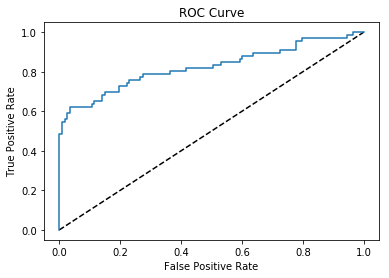

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(Y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [91]:
print('AUC Değeri : ', roc_auc_score(Y_test, predictions))

AUC Değeri :  0.7656878519710377


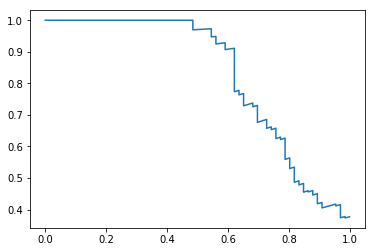

In [92]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(Y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [93]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(Y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(Y_test, predictions))

Logartimik Kayıp (log-loss) :  0.46482853952628767
Hata Oranı                  :  0.2122905027932961
